In [76]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [52]:
data = pd.read_csv('Dataset_1.csv', sep=';', na_values= 'Unknown')

In [53]:
data.drop("CLIENTNUM", axis=1, inplace=True)

In [54]:
trainset, testset = train_test_split(data, test_size = 0.2, random_state = 0 )

In [55]:
def encodage(dataframe):
    code = {
        'Attrited Customer':1, 'Existing Customer':0,
        'F':0, 'M':1,
        'Single':0, 'Married':1, 'Divorced':2, 
        'Less than $40K':0, '$40K - $60K':1,'$60K - $80K':2, '$80K - $120K':3, '$120K +':4,
        'Blue':0, 'Silver':1, 'Gold':2, 'Platinum':3,
        'Uneducated':0, 'College':1, 'High School':2, 'Graduate':3, 'Post-Graduate':4, 'Doctorate':5
    }
    for col in dataframe.select_dtypes('object').columns:
        dataframe.loc[:,col] = dataframe[col].map(code)
    
    return dataframe

In [56]:
def imputation(dataframe):
    return dataframe.dropna(axis=0)

In [57]:
def preprocessing(dataframe):
    dataframe = encodage(dataframe)
    dataframe = imputation(dataframe)
    
    X = dataframe.drop('Attrition_Flag', axis=1)
    y = dataframe['Attrition_Flag']
    
    print(y.value_counts())
    
    return X,y

In [63]:
X_train, y_train = preprocessing(trainset)

0    4764
1     889
Name: Attrition_Flag, dtype: int64


In [64]:
X_test, y_test = preprocessing(testset)

0    1204
1     224
Name: Attrition_Flag, dtype: int64


In [98]:
X_test.iloc[0:1,:]

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
3358,44,1,5,0.0,2.0,2.0,0,39,5,2,0,16034.0,1597,14437.0,0.775,3628,59,0.903,0.1


In [68]:
def evaluation (model) :
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    
    N, train_score, val_score = learning_curve(model ,X_train, y_train, 
                                               cv=4, scoring = 'f1',
                                               train_sizes= np.linspace(0.1, 1, 10))
#     plt.figure(figsize = (15,10))
#     plt.plot(N, train_score.mean(axis=1), label='train score')
#     plt.plot(N, val_score.mean(axis=1), label='validation score')
#     plt.legend()

In [61]:
model_1 = make_pipeline(SelectKBest(f_classif, k=9),RandomForestClassifier(random_state=0))

[[1182   22]
 [  37  187]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1204
           1       0.89      0.83      0.86       224

    accuracy                           0.96      1428
   macro avg       0.93      0.91      0.92      1428
weighted avg       0.96      0.96      0.96      1428



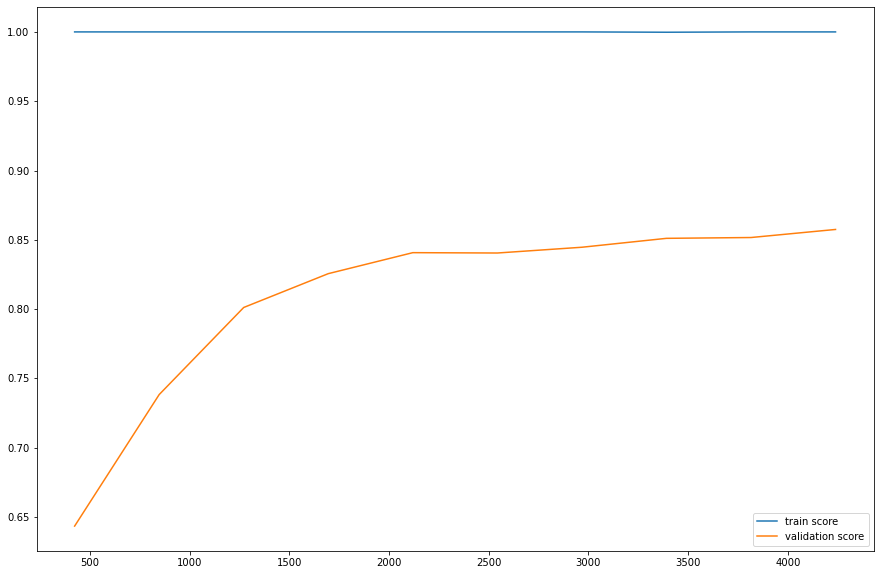

In [67]:
evaluation(model_1)

In [140]:
def model_final (model, X) :
    y = model.predict(X)
    if y == 0 :
        print("Le client n'a pas une envie d'ailleurs")
    else :
        print("!!! Attention !!! Le client est sur le point de départ")
    return 

In [147]:
precision, recall, threshold = precision_recall_curve(y_test, model_1.predict(X_test))

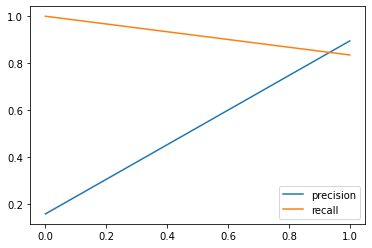

In [148]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [163]:
for i in range(1,1000, 5) :
    
    y_pred = model_final(model_1,X_test.iloc[i:i+1,:])
    y_pred

Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
!!! Attention !!! Le client est sur le point de départ
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
Le client n'a pas une envie d'ailleurs
!!! Attention !!! Le client est sur le point de départ
Le client n'a pas une envie d'ai

In [ ]:
# Local URL: http://localhost:8501
#   Network URL: http://10.10.20.39:8501